In [29]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
%autoreload 2

In [31]:
import tensorflow as tf

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

## Parameters

In [33]:
NSAMPLE = 2500

In [34]:
network_params = {}
network_params['dim_input'] = 1
network_params['dim_output'] = 1
network_params['k_mixtures'] = 6
network_params['n_hidden'] = [10]

adam_params = {
    'type': 'adam',
    'params': {'learning_rate' : 0.001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'use_locking': False}
}

network_params['optimiser'] = adam_params
epochs = 10000

In [35]:
from aml_dl.mdn.model.tf_mdn_model import MixtureDensityNetwork

In [36]:
sess = tf.InteractiveSession()

In [37]:
mdn = MixtureDensityNetwork(sess=sess, network_params=network_params)
mdn.init_model()

In [38]:
xs = np.random.uniform(-10.5, 10.5, (6, NSAMPLE)).T
ys = np.random.uniform(-10.5, 10.5, (3, NSAMPLE)).T

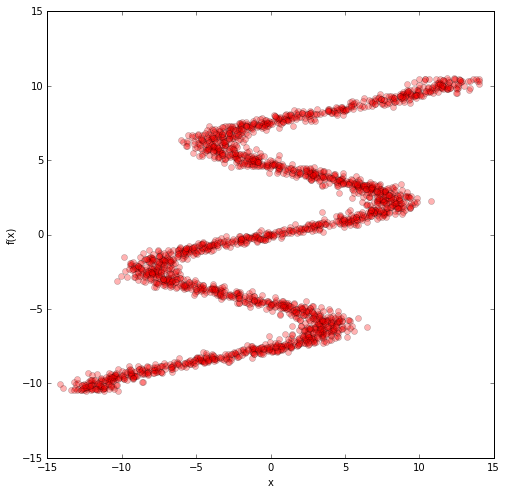

In [39]:

r_data = np.float32(np.random.normal(size=(NSAMPLE,1))) # random noise

y_data = np.float32(np.random.uniform(-10.5, 10.5, (1, NSAMPLE))).T
x_data = np.float32(np.sin(0.75*y_data)*7.0+y_data*0.5+r_data*1.0)


plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', alpha=0.3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [40]:
sess.run(tf.global_variables_initializer())

loss = mdn.train(sess, x_data, y_data, 10000)


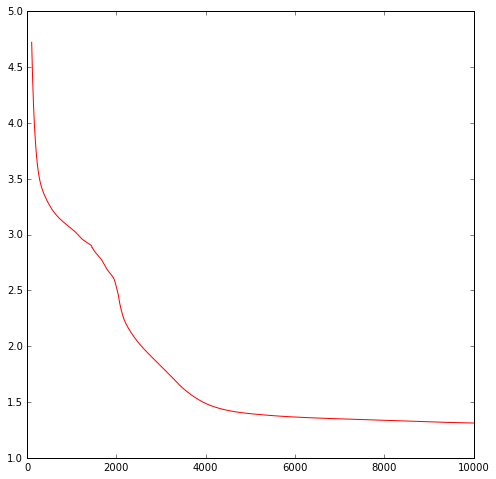

In [41]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(100, epochs,1), loss[100:], 'r-')

plt.show()

In [42]:
from aml_dl.mdn.model.tf_mdn_model import MixtureOfGaussians

In [43]:
mixture = MixtureOfGaussians()

In [44]:
x_test = np.float32(np.arange(-15,15,0.1))
NTEST = x_test.size
x_test = x_test.reshape(NTEST,1) # needs to be a matrix, not a vector


In [45]:
out_mu_test, out_sigma_test, out_pi_test = mdn.forward(sess, x_test)

In [46]:
# print out_mu_test.reshape((300,2))

In [47]:
out_mu_test = out_mu_test.reshape((300,10))
print out_pi_test.shape, x_test.shape, out_sigma_test.shape, out_mu_test.shape


ValueError: cannot reshape array of size 1800 into shape (300,10)

In [ ]:


y_test = mixture.generate_mixture_samples(out_pi_test, out_mu_test, out_sigma_test,100)

plt.figure(figsize=(8, 8))
plt.xlim([-15,15])
plt.ylim([-15,15])
plt.plot(x_data,y_data,'ro', x_test,y_test,'bo',alpha=0.3)
plt.show()

In [ ]:
x_heatmap_label = np.float32(np.arange(-15,15,0.1))
y_heatmap_label = np.float32(np.arange(-15,15,0.1))

def custom_gaussian(x, mu, std):
  oneDivSqrtTwoPI = 1 / math.sqrt(2*math.pi)
  x_norm = (x-mu)/std
  result = oneDivSqrtTwoPI*math.exp(-x_norm*x_norm/2)/std
  return result

def generate_heatmap(out_pi, out_mu, out_sigma, x_heatmap_label, y_heatmap_label):
  N = x_heatmap_label.size
  M = y_heatmap_label.size
  K = network_params['k_mixtures']

  z = np.zeros((N, M)) # initially random [0, 1]

  mu = 0
  std = 0
  pi = 0

  # transforms result into random ensembles
  for k in range(0, K):
    for i in range(0, M):
      pi = out_pi[i, k]
      mu = out_mu[i, k]
      std = out_sigma[i, k]
      for j in range(0, N):
        z[N-j-1, i] += pi * custom_gaussian(y_heatmap_label[j], mu, std)

  return z

def draw_heatmap(xedges, yedges, heatmap):
  extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
  plt.figure(figsize=(8, 8))
  plt.imshow(heatmap, extent=extent, interpolation='nearest', vmin=0.0, vmax=10.00)
  plt.colorbar()
  plt.show()



In [ ]:
z = generate_heatmap(out_pi_test, out_mu_test, out_sigma_test, x_heatmap_label, y_heatmap_label)


In [ ]:
draw_heatmap(x_heatmap_label, y_heatmap_label, z)

In [ ]:
np.max(z)